# Week 9 - Ensemble Learning: Boosting

Last week, we saw that **bagging** (**b**ootstrap **agg**regation) averages multiple classifiers or regressors fitted to different bootstrapped data samples, which has the effect of reducing the variance of the individual models and regularizing their fits to improve generalization (test performance).

This week, we continue our work with ensemble models, of which bagging is a special case. This week we cover **boosting**.

Boosting throws out bootstrapping in favor of sequential samples that push the individual models to focus on points where the model makes errors. This is primarily used to solve underfitting.

# Lecture 16 - Boosting and AdaBoost

First, let's import some things.

In [39]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor
from sklearn.tree import DecisionTreeClassifier


Training Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       160
           1       1.00      1.00      1.00       266

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426


Testing Classification Report:

               precision    recall  f1-score   support

           0       0.98      0.92      0.95        52
           1       0.96      0.99      0.97        91

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143


Testing Confusion Matrix:



<Figure size 432x288 with 0 Axes>

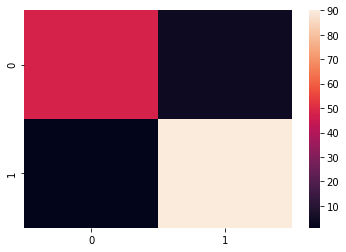

<Figure size 432x288 with 0 Axes>

In [30]:
data = load_breast_cancer()

X = data['data']
Y = data['target']

# split the data into train and test sets
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.25)

# build the classifier
model = AdaBoostClassifier()

# fit the classifier to the training data
model.fit(trainX, trainY)

# predict the labels of the training set
predictedY = model.predict(trainX)

# print quality metrics
print('\nTraining Classification Report:\n\n', classification_report(trainY, predictedY))

# predict the labels of the test set
predictedY = model.predict(testX)

# print quality metrics
print('\nTesting Classification Report:\n\n', classification_report(testY, predictedY))

# predict the labels of the test set
predictedY = model.predict(testX)

print('\nTesting Confusion Matrix:\n')

sn.heatmap(confusion_matrix(testY, predictedY))
plt.figure()


Training Classification Report:

               precision    recall  f1-score   support

           0       0.93      0.97      0.95        40
           1       0.98      0.95      0.97        60
           2       1.00      1.00      1.00        33

    accuracy                           0.97       133
   macro avg       0.97      0.97      0.97       133
weighted avg       0.97      0.97      0.97       133


Testing Classification Report:

               precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.73      1.00      0.85        11
           2       1.00      0.80      0.89        15

    accuracy                           0.91        45
   macro avg       0.91      0.92      0.90        45
weighted avg       0.93      0.91      0.91        45


Testing Confusion Matrix:



<Figure size 432x288 with 0 Axes>

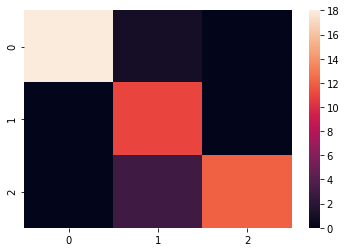

<Figure size 432x288 with 0 Axes>

In [34]:
data = load_wine()

X = data['data']
Y = data['target']

# split the data into train and test sets
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.25)

# build the classifier
model = AdaBoostClassifier()

# fit the classifier to the training data
model.fit(trainX, trainY)

# predict the labels of the training set
predictedY = model.predict(trainX)

# print quality metrics
print('\nTraining Classification Report:\n\n', classification_report(trainY, predictedY))

# predict the labels of the test set
predictedY = model.predict(testX)

# print quality metrics
print('\nTesting Classification Report:\n\n', classification_report(testY, predictedY))

# predict the labels of the test set
predictedY = model.predict(testX)

print('\nTesting Confusion Matrix:\n')

sn.heatmap(confusion_matrix(testY, predictedY))
plt.figure()

Let's try the MNIST dataset with AdaBoost.


Training Classification Report:

               precision    recall  f1-score   support

           0       0.81      0.90      0.86      5923
           1       0.83      0.94      0.88      6742
           2       0.78      0.55      0.65      5958
           3       0.74      0.58      0.65      6131
           4       0.75      0.78      0.77      5842
           5       0.68      0.64      0.66      5421
           6       0.68      0.87      0.76      5918
           7       0.74      0.72      0.73      6265
           8       0.67      0.70      0.68      5851
           9       0.63      0.61      0.62      5949

    accuracy                           0.73     60000
   macro avg       0.73      0.73      0.73     60000
weighted avg       0.73      0.73      0.73     60000


Testing Classification Report:

               precision    recall  f1-score   support

           0       0.82      0.90      0.86       980
           1       0.84      0.95      0.89      1135
         

<Figure size 432x288 with 0 Axes>

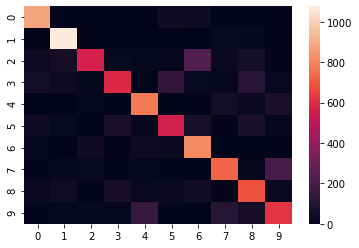

<Figure size 432x288 with 0 Axes>

In [12]:
(trainX, trainY), (testX, testY) = mnist.load_data()

# preprocess the data
trainX = trainX.reshape(trainX.shape[0], trainX.shape[1] * trainX.shape[2])
trainX = trainX.astype('float')/255.0

testX = testX.reshape(testX.shape[0], testX.shape[1] * testX.shape[2])
testX = testX.astype('float')/255.0

# build the classifier
model = AdaBoostClassifier(n_estimators = 100)

# fit the classifier to the training data
model.fit(trainX, trainY)

# predict the labels of the training set
predictedY = model.predict(trainX)

# print quality metrics
print('\nTraining Classification Report:\n\n', classification_report(trainY, predictedY))

# predict the labels of the test set
predictedY = model.predict(testX)

# print quality metrics
print('\nTesting Classification Report:\n\n', classification_report(testY, predictedY))

# predict the labels of the test set
predictedY = model.predict(testX)

print('\nTesting Confusion Matrix:\n')

sn.heatmap(confusion_matrix(testY, predictedY))
plt.figure()

Let's make the individual classifiers a little more sophisticated.


Training Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5923
           1       1.00      1.00      1.00      6742
           2       1.00      1.00      1.00      5958
           3       1.00      1.00      1.00      6131
           4       1.00      1.00      1.00      5842
           5       1.00      1.00      1.00      5421
           6       1.00      1.00      1.00      5918
           7       1.00      1.00      1.00      6265
           8       1.00      1.00      1.00      5851
           9       1.00      1.00      1.00      5949

    accuracy                           1.00     60000
   macro avg       1.00      1.00      1.00     60000
weighted avg       1.00      1.00      1.00     60000


Testing Classification Report:

               precision    recall  f1-score   support

           0       0.91      0.93      0.92       980
           1       0.96      0.96      0.96      1135
         

<Figure size 432x288 with 0 Axes>

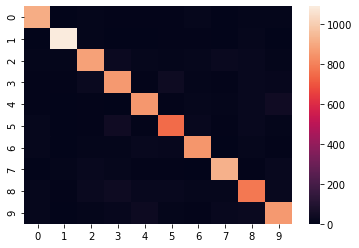

<Figure size 432x288 with 0 Axes>

In [35]:
(trainX, trainY), (testX, testY) = mnist.load_data()

# preprocess the data
trainX = trainX.reshape(trainX.shape[0], trainX.shape[1] * trainX.shape[2])
trainX = trainX.astype('float')/255.0

testX = testX.reshape(testX.shape[0], testX.shape[1] * testX.shape[2])
testX = testX.astype('float')/255.0

# build the classifier
model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=None))

# fit the classifier to the training data
model.fit(trainX, trainY)

# predict the labels of the training set
predictedY = model.predict(trainX)

# print quality metrics
print('\nTraining Classification Report:\n\n', classification_report(trainY, predictedY))

# predict the labels of the test set
predictedY = model.predict(testX)

# print quality metrics
print('\nTesting Classification Report:\n\n', classification_report(testY, predictedY))

# predict the labels of the test set
predictedY = model.predict(testX)

print('\nTesting Confusion Matrix:\n')

sn.heatmap(confusion_matrix(testY, predictedY))
plt.figure()

G:\Miniconda3\envs\DL\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



Training Classification Report:

               precision    recall  f1-score   support

           0       0.36      0.34      0.35      5000
           1       0.34      0.34      0.34      5000
           2       0.20      0.10      0.14      5000
           3       0.23      0.12      0.16      5000
           4       0.23      0.20      0.21      5000
           5       0.29      0.27      0.28      5000
           6       0.29      0.55      0.38      5000
           7       0.35      0.30      0.32      5000
           8       0.39      0.47      0.43      5000
           9       0.38      0.48      0.42      5000

    accuracy                           0.32     50000
   macro avg       0.31      0.32      0.30     50000
weighted avg       0.31      0.32      0.30     50000


Testing Classification Report:

               precision    recall  f1-score   support

           0       0.33      0.33      0.33      1000
           1       0.33      0.33      0.33      1000
         

<Figure size 432x288 with 0 Axes>

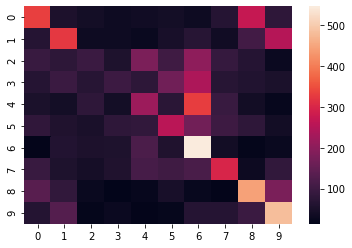

<Figure size 432x288 with 0 Axes>

In [32]:
(trainX, trainY), (testX, testY) = cifar10.load_data()

# preprocess the data
trainX = trainX.reshape(trainX.shape[0], trainX.shape[1] * trainX.shape[2] * 3)
trainX = trainX.astype('float')/255.0

testX = testX.reshape(testX.shape[0], testX.shape[1] * testX.shape[2] * 3)
testX = testX.astype('float')/255.0

# build the classifier
model = AdaBoostClassifier()

# fit the classifier to the training data
model.fit(trainX, trainY)

# predict the labels of the training set
predictedY = model.predict(trainX)

# print quality metrics
print('\nTraining Classification Report:\n\n', classification_report(trainY, predictedY))

# predict the labels of the test set
predictedY = model.predict(testX)

# print quality metrics
print('\nTesting Classification Report:\n\n', classification_report(testY, predictedY))

# predict the labels of the test set
predictedY = model.predict(testX)

print('\nTesting Confusion Matrix:\n')

sn.heatmap(confusion_matrix(testY, predictedY))
plt.figure()

# Lecture 17 - Gradient Boosting

We previously discussed boosting and AdaBoost, a powerful ensemble method for classification or regression.

This week, we will learn about another variation of boosting: **gradient boosting** and the **XGBoost** algorithm, currently one of the best classifiers for many problems.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_wine
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import cifar10

Let's try gradient boosting.

      Iter       Train Loss   Remaining Time 
         1           1.8954            4.50m
         2           1.6553            4.53m
         3           1.4853            4.51m
         4           1.3380            4.45m
         5           1.2215            4.39m
         6           1.1169            4.35m
         7           1.0331            4.29m
         8           0.9617            4.25m
         9           0.8929            4.20m
        10           0.8356            4.15m
        20           0.4939            3.68m
        30           0.3410            3.23m
        40           0.2574            2.77m
        50           0.2060            2.31m
        60           0.1688            1.84m
        70           0.1415            1.37m
        80           0.1202           54.88s
        90           0.1024           27.42s
       100           0.0879            0.00s

Training Classification Report:

               precision    recall  f1-score   support

         

<Figure size 432x288 with 0 Axes>

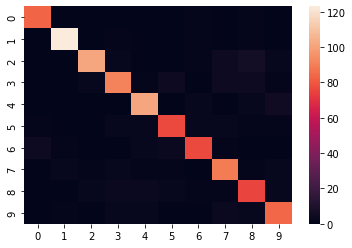

<Figure size 432x288 with 0 Axes>

In [39]:
(trainX, trainY), (testX, testY) = mnist.load_data()

trainX = trainX[:10000]
trainY = trainY[:10000]

testX = testX[:1000]
testY = testY[:1000]

# preprocess the data
trainX = trainX.reshape(trainX.shape[0], trainX.shape[1] * trainX.shape[2])
trainX = trainX.astype('float')/255.0

testX = testX.reshape(testX.shape[0], testX.shape[1] * testX.shape[2])
testX = testX.astype('float')/255.0

# build the classifier
model = GradientBoostingClassifier(verbose = 1)

# fit the classifier to the training data
model.fit(trainX, trainY)

# predict the labels of the training set
predictedY = model.predict(trainX)

# print quality metrics
print('\nTraining Classification Report:\n\n', classification_report(trainY, predictedY))

# predict the labels of the test set
predictedY = model.predict(testX)

# print quality metrics
print('\nTesting Classification Report:\n\n', classification_report(testY, predictedY))

# predict the labels of the test set
predictedY = model.predict(testX)

print('\nTesting Confusion Matrix:\n')

sn.heatmap(confusion_matrix(testY, predictedY))
plt.figure()

Note that we ran with a training set of just 10,000 images because gradient boosting is incapable of parallelization and is, therefore, rather slow.

Let's also try the `HistGradientBoostingClassifier`, an implementation of an algorithm similar to ordinary `GradientBoostingClassifier` but it sometimes runs much faster on large datasets. It is a `scikit-learn` implementation based on Microsoft's [Light GBM](https://github.com/Microsoft/LightGBM).

Binning 0.339 GB of training data: 1.391 s
Binning 0.038 GB of validation data: 0.013 s
Fitting gradient boosted rounds:
[1/100] 10 trees, 310 leaves (31 on avg), max depth = 13, train loss: 1.61218, val loss: 1.63115, in 1.493s
[2/100] 10 trees, 310 leaves (31 on avg), max depth = 15, train loss: 1.29579, val loss: 1.32018, in 1.502s
[3/100] 10 trees, 310 leaves (31 on avg), max depth = 14, train loss: 1.08075, val loss: 1.10960, in 1.486s
[4/100] 10 trees, 310 leaves (31 on avg), max depth = 13, train loss: 0.91908, val loss: 0.95158, in 1.494s
[5/100] 10 trees, 310 leaves (31 on avg), max depth = 15, train loss: 0.79140, val loss: 0.82769, in 1.482s
[6/100] 10 trees, 310 leaves (31 on avg), max depth = 11, train loss: 0.68864, val loss: 0.72719, in 1.508s
[7/100] 10 trees, 310 leaves (31 on avg), max depth = 11, train loss: 0.60453, val loss: 0.64645, in 1.508s
[8/100] 10 trees, 310 leaves (31 on avg), max depth = 10, train loss: 0.53510, val loss: 0.57971, in 1.500s
[9/100] 10 tree

<Figure size 432x288 with 0 Axes>

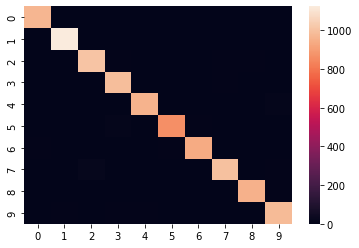

<Figure size 432x288 with 0 Axes>

In [6]:
from sklearn.ensemble import HistGradientBoostingClassifier

(trainX, trainY), (testX, testY) = mnist.load_data()

# preprocess the data
trainX = trainX.reshape(trainX.shape[0], trainX.shape[1] * trainX.shape[2])
trainX = trainX.astype('float')/255.0

testX = testX.reshape(testX.shape[0], testX.shape[1] * testX.shape[2])
testX = testX.astype('float')/255.0

# build the classifier
model = HistGradientBoostingClassifier(verbose = 1)

# fit the classifier to the training data
model.fit(trainX, trainY)

# predict the labels of the training set
predictedY = model.predict(trainX)

# print quality metrics
print('\nTraining Classification Report:\n\n', classification_report(trainY, predictedY))

# predict the labels of the test set
predictedY = model.predict(testX)

# print quality metrics
print('\nTesting Classification Report:\n\n', classification_report(testY, predictedY))

# predict the labels of the test set
predictedY = model.predict(testX)

print('\nTesting Confusion Matrix:\n')

sn.heatmap(confusion_matrix(testY, predictedY))
plt.figure()

This method runs way faster and has better accuracy.

## CIFAR-10 Examples

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.


building tree 1 of 100building tree 2 of 100building tree 3 of 100

building tree 4 of 100

building tree 5 of 100
building tree 6 of 100building tree 7 of 100
building tree 8 of 100

building tree 9 of 100building tree 10 of 100building tree 11 of 100
building tree 12 of 100


building tree 13 of 100
building tree 14 of 100building tree 15 of 100

building tree 16 of 100building tree 17 of 100

building tree 18 of 100
building tree 19 of 100building tree 20 of 100
building tree 21 of 100

building tree 22 of 100building tree 23 of 100

building tree 24 of 100
building tree 25 of 100
building tree 26 of 100building tree 27 of 100

building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100building tree 32 of 100

building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=-1)]: Done  88 out of 100 | elapsed:    6.1s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.8s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  88 out of 100 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=32)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  88 out of 100 | elapsed:    0.0s remaining:    0.0s



Training Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5000
           1       1.00      1.00      1.00      5000
           2       1.00      1.00      1.00      5000
           3       1.00      1.00      1.00      5000
           4       1.00      1.00      1.00      5000
           5       1.00      1.00      1.00      5000
           6       1.00      1.00      1.00      5000
           7       1.00      1.00      1.00      5000
           8       1.00      1.00      1.00      5000
           9       1.00      1.00      1.00      5000

    accuracy                           1.00     50000
   macro avg       1.00      1.00      1.00     50000
weighted avg       1.00      1.00      1.00     50000


Testing Classification Report:

               precision    recall  f1-score   support

           0       0.55      0.57      0.56      1000
           1       0.52      0.55      0.54      1000
         

[Parallel(n_jobs=32)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  88 out of 100 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=32)]: Done 100 out of 100 | elapsed:    0.0s finished


<Figure size 432x288 with 0 Axes>

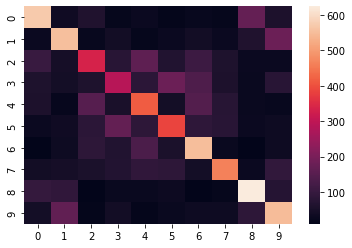

<Figure size 432x288 with 0 Axes>

In [13]:
from sklearn.ensemble import ExtraTreesClassifier

(trainX, trainY), (testX, testY) = cifar10.load_data()

# preprocess the data
trainX = trainX.reshape(trainX.shape[0], trainX.shape[1] * trainX.shape[2] * 3)
trainX = trainX.astype('float')/255.0

testX = testX.reshape(testX.shape[0], testX.shape[1] * testX.shape[2] * 3)
testX = testX.astype('float')/255.0

# build the classifier
model = ExtraTreesClassifier(verbose = 2, n_jobs = -1)

# fit the classifier to the training data
model.fit(trainX, trainY.ravel())

# predict the labels of the training set
predictedY = model.predict(trainX)

# print quality metrics
print('\nTraining Classification Report:\n\n', classification_report(trainY, predictedY))

# predict the labels of the test set
predictedY = model.predict(testX)

# print quality metrics
print('\nTesting Classification Report:\n\n', classification_report(testY, predictedY))

# predict the labels of the test set
predictedY = model.predict(testX)

print('\nTesting Confusion Matrix:\n')

sn.heatmap(confusion_matrix(testY, predictedY))
plt.figure()

### Breast Cancer Classification

In [16]:
from xgboost import XGBClassifier

[23:21:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.45594
[1]	validation_0-logloss:0.33100
[2]	validation_0-logloss:0.25211
[3]	validation_0-logloss:0.19699
[4]	validation_0-logloss:0.15478
[5]	validation_0-logloss:0.12618
[6]	validation_0-logloss:0.10818
[7]	validation_0-logloss:0.09551
[8]	validation_0-logloss:0.08214
[9]	validation_0-logloss:0.07518
[10]	validation_0-logloss:0.06873
[11]	validation_0-logloss:0.06348
[12]	validation_0-logloss:0.05953
[13]	validation_0-logloss:0.05945
[14]	validation_0-logloss:0.05552
[15]	validation_0-logloss:0.05261
[16]	validation_0-logloss:0.05027
[17]	validation_0-logloss:0.05126
[18]	validation_0-logloss:0.05253
[19]	validation_0-logloss:0.05111
[20]	validation_0-lo

<Figure size 432x288 with 0 Axes>

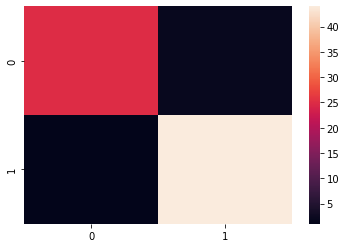

<Figure size 432x288 with 0 Axes>

In [27]:
cancer = load_breast_cancer()

X = cancer['data']
Y = cancer['target']

# split the data into train and test sets
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.25)
valX, testX, valY, testY = train_test_split(testX, testY, test_size = 0.5)

# build the classifier
model = XGBClassifier(n_jobs = -1)

# fit the classifier to the training data
model.fit(trainX, trainY, eval_set = [(valX, valY)])

# predict the labels of the training set
predictedY = model.predict(trainX)

# print quality metrics
print('\nTraining Classification Report:\n\n', classification_report(trainY, predictedY))

# predict the labels of the test set
predictedY = model.predict(testX)

# print quality metricsl
print('\nTesting Classification Report:\n\n', classification_report(testY, predictedY))

# predict the labels of the test set
predictedY = model.predict(testX)

print('\nTesting Confusion Matrix:\n')

sn.heatmap(confusion_matrix(testY, predictedY))
plt.figure()

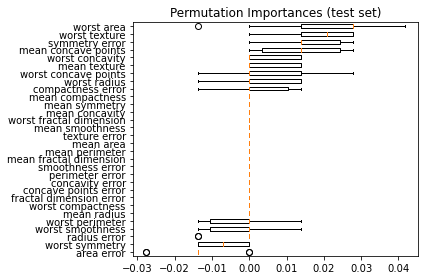

In [28]:
result = permutation_importance(model, testX, testY, n_repeats = 10, n_jobs = -1)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T, vert = False,
           labels = cancer.feature_names[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

### Wine Example

[23:22:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-mlogloss:0.89066
[1]	validation_0-mlogloss:0.69186
[2]	validation_0-mlogloss:0.58930
[3]	validation_0-mlogloss:0.52835
[4]	validation_0-mlogloss:0.45808
[5]	validation_0-mlogloss:0.38577
[6]	validation_0-mlogloss:0.33619
[7]	validation_0-mlogloss:0.30202
[8]	validation_0-mlogloss:0.29147
[9]	validation_0-mlogloss:0.24931
[10]	validation_0-mlogloss:0.22095
[11]	validation_0-mlogloss:0.20778
[12]	validation_0-mlogloss:0.18805
[13]	validation_0-mlogloss:0.18118
[14]	validation_0-mlogloss:0.16026
[15]	validation_0-mlogloss:0.16059
[16]	validation_0-mlogloss:0.15153
[17]	validation_0-mlogloss:0.13565
[18]	validation_0-mlogloss:0.13367
[19]	validation_0-mlogloss:0.12542

C:\Users\Ryan\miniconda3\envs\DL\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


<Figure size 432x288 with 0 Axes>

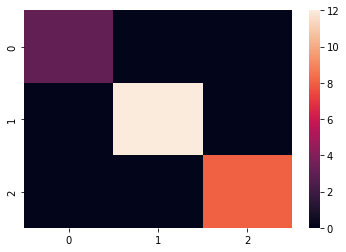

<Figure size 432x288 with 0 Axes>

In [29]:
wine = load_wine()

X = wine['data']
Y = wine['target']

# split the data into train and test sets
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.25)
valX, testX, valY, testY = train_test_split(testX, testY, test_size = 0.5)

# build the classifier
model = XGBClassifier(n_jobs = -1)

# fit the classifier to the training data
model.fit(trainX, trainY, eval_set = [(valX, valY)])

# predict the labels of the training set
predictedY = model.predict(trainX)

# print quality metrics
print('\nTraining Classification Report:\n\n', classification_report(trainY, predictedY))

# predict the labels of the test set
predictedY = model.predict(testX)

# print quality metrics
print('\nTesting Classification Report:\n\n', classification_report(testY, predictedY))

# predict the labels of the test set
predictedY = model.predict(testX)

print('\nTesting Confusion Matrix:\n')

sn.heatmap(confusion_matrix(testY, predictedY))
plt.figure()

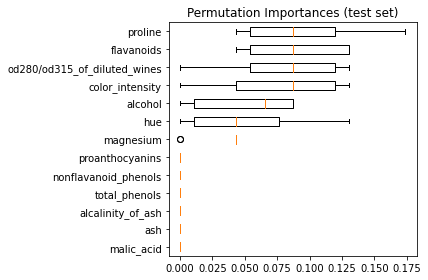

In [30]:
result = permutation_importance(model, testX, testY, n_repeats = 10, n_jobs = -1)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T, vert = False,
           labels = np.array(wine.feature_names)[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

### MNIST Example

C:\Users\Ryan\miniconda3\envs\DL\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:22:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-mlogloss:1.37077
[1]	validation_0-mlogloss:1.05099
[2]	validation_0-mlogloss:0.84082
[3]	validation_0-mlogloss:0.69238
[4]	validation_0-mlogloss:0.58026
[5]	validation_0-mlogloss:0.49551
[6]	validation_0-mlogloss:0.43004
[7]	validation_0-mlogloss:0.37868
[8]	validation_0-mlogloss:0.33703
[9]	validation_0-mlogloss:0.30279
[10]	validation_0-mlogloss:0.27499
[11]	validation_0-mlogloss:0.25283
[12]	validation_0-mlogloss:0.23451
[13]	validation_0-mlogloss:0.21916
[14]	validation_0-mlogloss:0.20493
[15]	validation_0-mlogloss:0.19385
[16]	validation_0-mlogloss:0.18388
[17]	validation_0-mlogloss:0.17608
[18]	validation_0-mlogloss:0.16811
[19]	validation_0-mlogloss:0.16050

<Figure size 432x288 with 0 Axes>

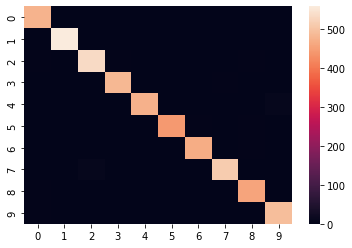

<Figure size 432x288 with 0 Axes>

In [31]:
(trainX, trainY), (testX, testY) = mnist.load_data()

# preprocess the data
trainX = trainX.reshape(trainX.shape[0], trainX.shape[1] * trainX.shape[2])
trainX = trainX.astype('float')/255.0

testX = testX.reshape(testX.shape[0], testX.shape[1] * testX.shape[2])
testX = testX.astype('float')/255.0

valX, testX, valY, testY = train_test_split(testX, testY, test_size = 0.5)

# build the classifier
model = XGBClassifier(n_jobs = -1)

# fit the classifier to the training data
model.fit(trainX, trainY, eval_set = [(valX, valY)])

# predict the labels of the training set
predictedY = model.predict(trainX)

# print quality metrics
print('\nTraining Classification Report:\n\n', classification_report(trainY, predictedY))

# predict the labels of the test set
predictedY = model.predict(testX)

# print quality metrics
print('\nTesting Classification Report:\n\n', classification_report(testY, predictedY))

# predict the labels of the test set
predictedY = model.predict(testX)

print('\nTesting Confusion Matrix:\n')

sn.heatmap(confusion_matrix(testY, predictedY))
plt.figure()

Let's try to tune XGBoost with 5-fold cross-validation to see if we can improve the results.

C:\Users\Ryan\miniconda3\envs\DL\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:23:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-mlogloss:1.37077
[1]	validation_0-mlogloss:1.05099
[2]	validation_0-mlogloss:0.84082
[3]	validation_0-mlogloss:0.69238
[4]	validation_0-mlogloss:0.58026
[5]	validation_0-mlogloss:0.49551
[6]	validation_0-mlogloss:0.43004
[7]	validation_0-mlogloss:0.37868
[8]	validation_0-mlogloss:0.33703
[9]	validation_0-mlogloss:0.30279
[10]	validation_0-mlogloss:0.27499
[11]	validation_0-mlogloss:0.25283
[12]	validation_0-mlogloss:0.23451
[13]	validation_0-mlogloss:0.21916
[14]	validation_0-mlogloss:0.20493
[15]	validation_0-mlogloss:0.19385
[16]	validation_0-mlogloss:0.18388
[17]	validation_0-mlogloss:0.17608
[18]	validation_0-mlogloss:0.16811
[19]	validation_0-mlogloss:0.16050

<Figure size 432x288 with 0 Axes>

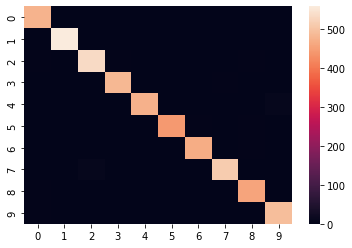

<Figure size 432x288 with 0 Axes>

In [32]:
parameters = {'max_depth': [1, 5, 10, 100, None], 'reg_lambda': [0.001, 0.01, 0.1, 1, 10]}
model = GridSearchCV(XGBClassifier(n_jobs = -1, eval_metric='mlogloss'), parameters, n_jobs = -1)

# build the classifier
model = XGBClassifier(n_jobs = -1)

# fit the classifier to the training data
model.fit(trainX, trainY, eval_set = [(valX, valY)])

# predict the labels of the training set
predictedY = model.predict(trainX)

# print quality metrics
print('\nTraining Classification Report:\n\n', classification_report(trainY, predictedY))

# predict the labels of the test set
predictedY = model.predict(testX)

# print quality metrics
print('\nTesting Classification Report:\n\n', classification_report(testY, predictedY))

# predict the labels of the test set
predictedY = model.predict(testX)

print('\nTesting Confusion Matrix:\n')

sn.heatmap(confusion_matrix(testY, predictedY))
plt.figure()

So, we tried, but made no gains.

### CIFAR10 Example

[23:25:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-mlogloss:2.13656
[1]	validation_0-mlogloss:2.03318
[2]	validation_0-mlogloss:1.95227
[3]	validation_0-mlogloss:1.89216
[4]	validation_0-mlogloss:1.83970
[5]	validation_0-mlogloss:1.79876
[6]	validation_0-mlogloss:1.76423
[7]	validation_0-mlogloss:1.73341
[8]	validation_0-mlogloss:1.70854
[9]	validation_0-mlogloss:1.68552
[10]	validation_0-mlogloss:1.66271
[11]	validation_0-mlogloss:1.64533
[12]	validation_0-mlogloss:1.62746
[13]	validation_0-mlogloss:1.61124
[14]	validation_0-mlogloss:1.59772
[15]	validation_0-mlogloss:1.58506
[16]	validation_0-mlogloss:1.57178
[17]	validation_0-mlogloss:1.56225
[18]	validation_0-mlogloss:1.55158
[19]	validation_0-mlogloss:1.54190

<Figure size 432x288 with 0 Axes>

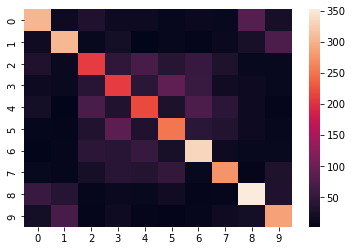

<Figure size 432x288 with 0 Axes>

In [35]:
(trainX, trainY), (testX, testY) = cifar10.load_data()

# preprocess the data
trainX = trainX.reshape(trainX.shape[0], trainX.shape[1] * trainX.shape[2] * 3)
trainX = trainX.astype('float')/255.0

testX = testX.reshape(testX.shape[0], testX.shape[1] * testX.shape[2] * 3)
testX = testX.astype('float')/255.0

valX, testX, valY, testY = train_test_split(testX, testY, test_size = 0.5)

# build the classifier
model = XGBClassifier(n_jobs = -1)

# fit the classifier to the training data
model.fit(trainX, trainY.ravel(), eval_set = [(valX, valY.ravel())])

# predict the labels of the training set
predictedY = model.predict(trainX)

# print quality metrics
print('\nTraining Classification Report:\n\n', classification_report(trainY, predictedY))

# predict the labels of the test set
predictedY = model.predict(testX)

# print quality metrics
print('\nTesting Classification Report:\n\n', classification_report(testY, predictedY))

# predict the labels of the test set
predictedY = model.predict(testX)

print('\nTesting Confusion Matrix:\n')

sn.heatmap(confusion_matrix(testY, predictedY))
plt.figure()

[23:30:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-mlogloss:2.13656
[1]	validation_0-mlogloss:2.03318
[2]	validation_0-mlogloss:1.95227
[3]	validation_0-mlogloss:1.89216
[4]	validation_0-mlogloss:1.83970
[5]	validation_0-mlogloss:1.79876
[6]	validation_0-mlogloss:1.76423
[7]	validation_0-mlogloss:1.73341
[8]	validation_0-mlogloss:1.70854
[9]	validation_0-mlogloss:1.68552
[10]	validation_0-mlogloss:1.66271
[11]	validation_0-mlogloss:1.64533
[12]	validation_0-mlogloss:1.62746
[13]	validation_0-mlogloss:1.61124
[14]	validation_0-mlogloss:1.59772
[15]	validation_0-mlogloss:1.58506
[16]	validation_0-mlogloss:1.57178
[17]	validation_0-mlogloss:1.56225
[18]	validation_0-mlogloss:1.55158
[19]	validation_0-mlogloss:1.54190

<Figure size 432x288 with 0 Axes>

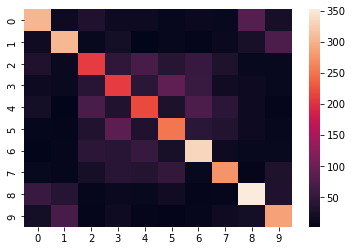

<Figure size 432x288 with 0 Axes>

In [37]:
parameters = {'max_depth': [1, 5, 10, 100, None], 'reg_lambda': [0.001, 0.01, 0.1, 1, 10]}

model = GridSearchCV(XGBClassifier(n_jobs = -1, eval_metric='mlogloss'), parameters, n_jobs = -1)

# build the classifier
model = XGBClassifier(n_jobs = -1)

# fit the classifier to the training data
model.fit(trainX, trainY.ravel(), eval_set = [(valX, valY.ravel())])

# predict the labels of the training set
predictedY = model.predict(trainX)

# print quality metrics
print('\nTraining Classification Report:\n\n', classification_report(trainY, predictedY))

# predict the labels of the test set
predictedY = model.predict(testX)

# print quality metrics
print('\nTesting Classification Report:\n\n', classification_report(testY, predictedY))

# predict the labels of the test set
predictedY = model.predict(testX)

print('\nTesting Confusion Matrix:\n')

sn.heatmap(confusion_matrix(testY, predictedY))
plt.figure()